Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

Data set

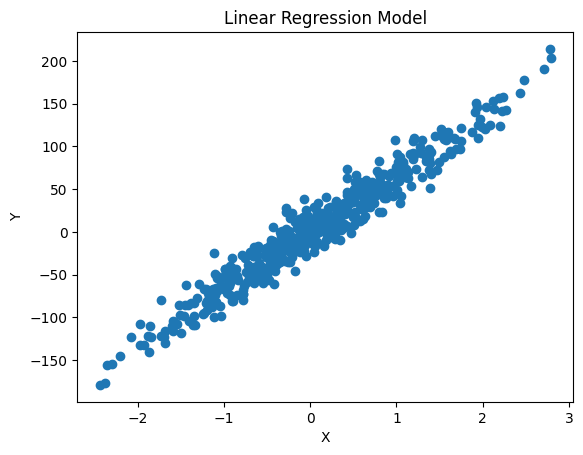

In [3]:
X, y = datasets.make_regression(
    n_samples=500, n_features=1, noise=15, random_state=4)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X, y)
plt.show()

Model

In [4]:
class LinearRegression:
    # setting default values, learning rate is set to 0.01 which is good middle ground
    def __init__(self, learningRate: int = 0.01, numberOfIterations: int = 1000) -> None:
        self.learningRate = learningRate
        self.numberOfIterations = numberOfIterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # initialize random values that will be updated using Gradient Descent Algorithm
        numberOfSamples, numberOfFeatures = X.shape
        self.weights = np.random.rand(numberOfFeatures)
        self.bias: int = 0
        
        # using Gradient Descent Algorithm to update values of weights and bias
        for _ in range(self.numberOfIterations):
            yPredicted = np.dot(X, self.weights) + self.bias
            # calculate deriatives
            dw = (1/numberOfSamples) * np.dot(X.T, yPredicted - y)
            db = (1/numberOfSamples) * np.sum(yPredicted - y)
            # update weights and bias with given learning rate
            self.weights = self.weights - self.learningRate * dw
            self.bias = self.bias - self.learningRate * db
        return self
    
    def predict(self, X):
        return np.dot(X,self.weights) + self.bias

Train

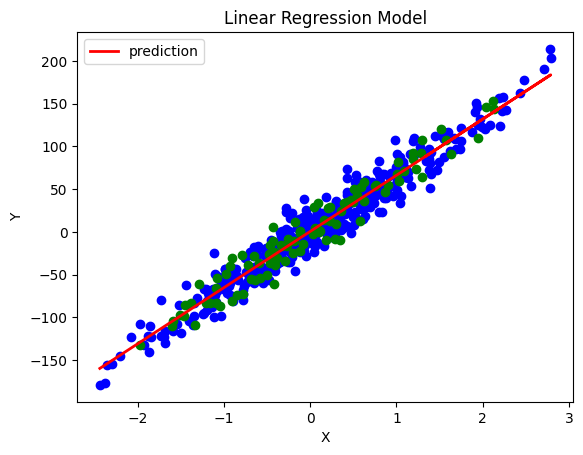

In [5]:
regressor = LinearRegression()
regressor.fit(XTrain, yTrain)
predictions = regressor.predict(XTest)

plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), linewidth=2,
            color='red', label='prediction')
plt.legend()
plt.show()

Evaluation

In [6]:
MSE = mean_squared_error(y_true=y_test,y_pred=predictions)
RMSE = root_mean_squared_error(y_true=y_test,y_pred=predictions)
print(f'MSE:  {MSE:.5f} \nRMSE: {RMSE:.5f}')

MSE:  203.22138 
RMSE: 14.25557
